import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

read the data

In [3]:
calories_df = pd.read_csv('calories.csv')
exercise_df = pd.read_csv('exercise.csv')
print(calories_df.head())
exercise_df.head()

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


combine the two dfs

In [4]:
calories_exercise_df = pd.concat([exercise_df, calories_df.Calories], axis = 1)
calories_exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


get some info about the data

In [5]:
print(calories_exercise_df.shape)
print('------------------------------------------')
print(calories_exercise_df.describe())
print('------------------------------------------')
calories_exercise_df.isnull().sum()

(15000, 9)
------------------------------------------
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000 

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

label encoding

In [6]:
label_encoder = LabelEncoder()
calories_exercise_df['Gender'] = label_encoder.fit_transform(calories_exercise_df['Gender'])
calories_exercise_df.Gender.value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

visualise the data

<ipython-input-7-7b3916aa7c1f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_exercise_df.Age)


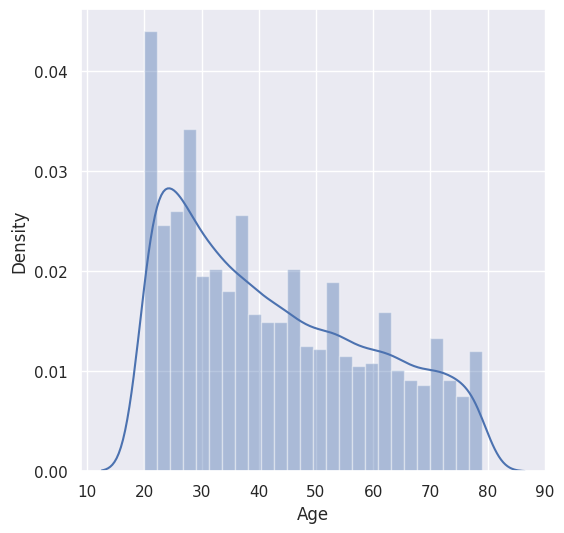

<ipython-input-7-7b3916aa7c1f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_exercise_df.Height)


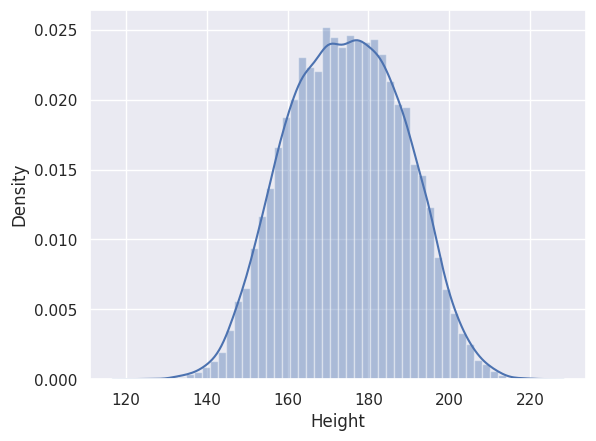

<ipython-input-7-7b3916aa7c1f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_exercise_df.Weight)


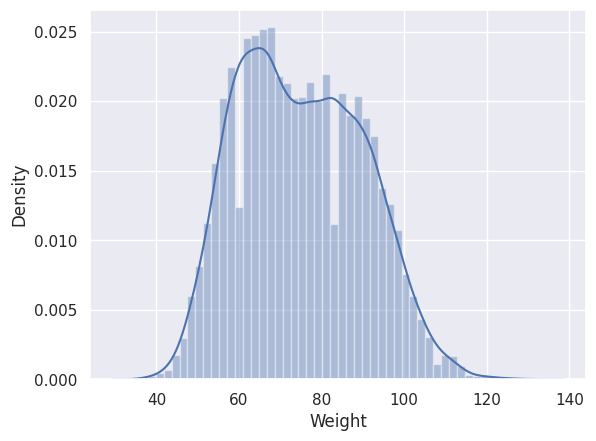

<ipython-input-7-7b3916aa7c1f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_exercise_df.Duration)


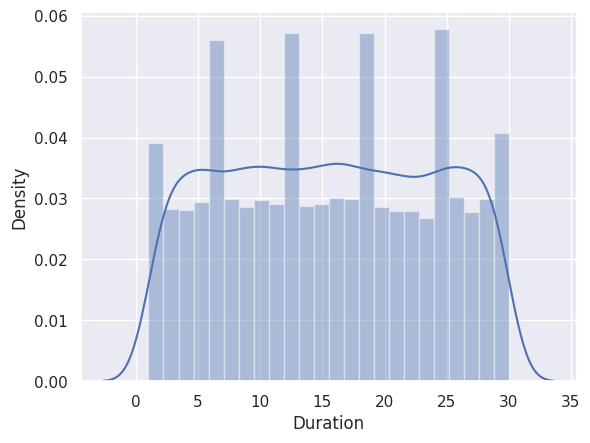

<ipython-input-7-7b3916aa7c1f>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_exercise_df.Heart_Rate)


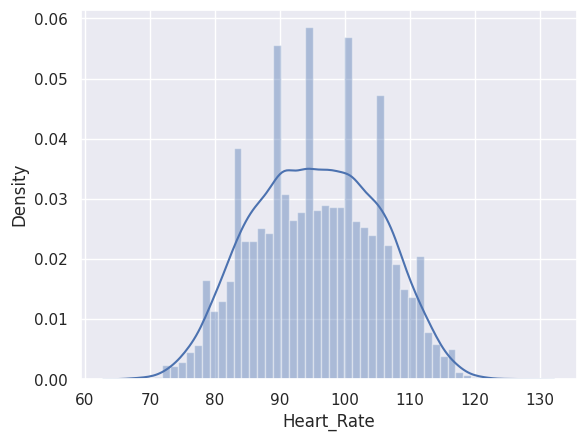

<ipython-input-7-7b3916aa7c1f>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_exercise_df.Body_Temp)


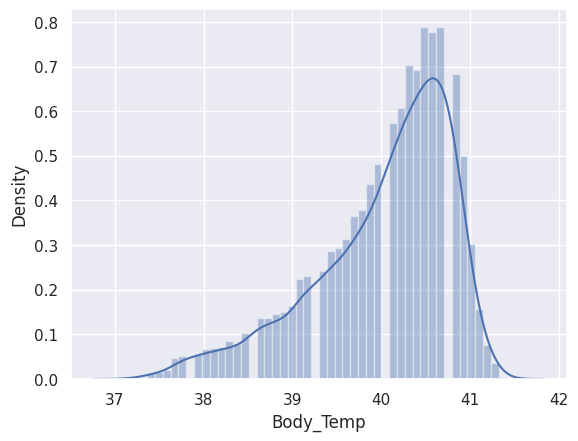

<ipython-input-7-7b3916aa7c1f>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_exercise_df.Calories)


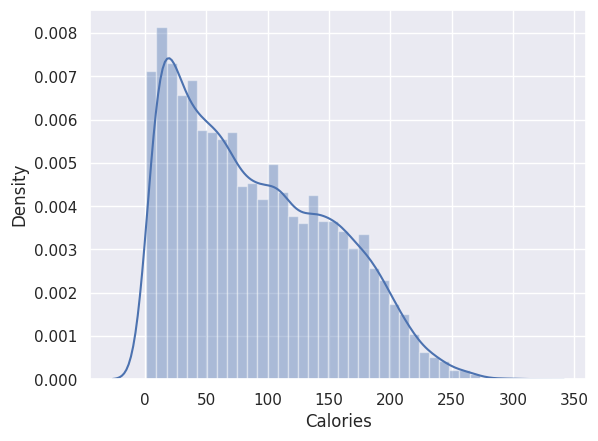

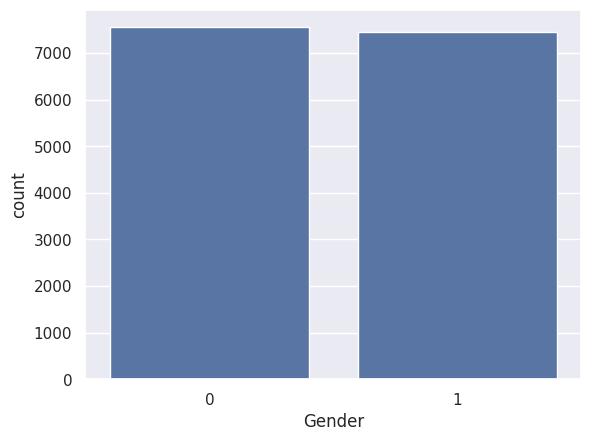

In [7]:
sns.set()
plt.figure(figsize = (6, 6))

sns.distplot(calories_exercise_df.Age)
plt.show()

sns.distplot(calories_exercise_df.Height)
plt.show()

sns.distplot(calories_exercise_df.Weight)
plt.show()

sns.distplot(calories_exercise_df.Duration)
plt.show()

sns.distplot(calories_exercise_df.Heart_Rate)
plt.show()

sns.distplot(calories_exercise_df.Body_Temp)
plt.show()

sns.distplot(calories_exercise_df.Calories)
plt.show()

sns.countplot(x = 'Gender', data = calories_exercise_df)
plt.show()

visualise correlation between variables

<Axes: >

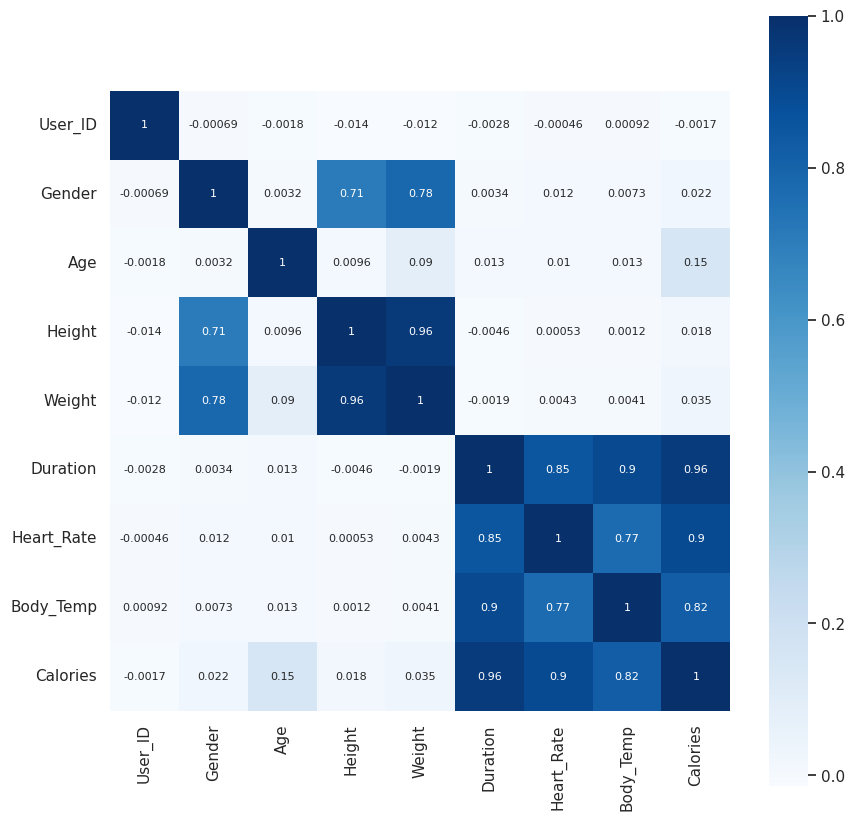

In [17]:
correlation = calories_exercise_df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, annot = True, square = True, cmap = 'Blues',annot_kws = {'size': 8}, cbar = True)

split the data

In [19]:
X = calories_exercise_df.drop(columns = ['User_ID', 'Calories'], axis = 1)
Y = calories_exercise_df.Calories
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

create and train the model

In [22]:
xgboost = XGBRegressor()
xgboost.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluate the model on training and testing data

In [23]:
Y_train_prediction = xgboost.predict(X_train)
r2_score_train = r2_score(Y_train, Y_train_prediction)
rmse_train = mean_squared_error(Y_train, Y_train_prediction, squared = False)
print('r2 score for training data =', r2_score_train)
print('rmse for training data =', rmse_train)
print('--------------------------------------------------')
Y_test_prediction = xgboost.predict(X_test)
r2_score_test = r2_score(Y_test, Y_test_prediction)
rmse_test = mean_squared_error(Y_test, Y_test_prediction, squared = False)
print('r2 score for test data =', r2_score_test)
print('rmse for test data =', rmse_test)


r2 score for training data = 0.9995691477017405
rmse for training data = 1.2952502203949643
--------------------------------------------------
r2 score for test data = 0.998800624504713
rmse for test data = 2.1704170134933394
